# VOLTAGE DIVIDER DESIGN FOR LIGHT DEPENDENT RESISTOR

##  Fotoresistor:
- Ref: LDR GL5539

In [2397]:
# Define the path to the sample data file:

SAMPLE_DATA_FILE_PATH: str = "data/LDR_GL5539.csv"

MIN_ILLUMINANCE_LUX: float = 50
MAX_ILLUMINANCE_LUX: float = 600

In [2398]:
# Import modules:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2399]:
# Read the sample data:

sample_data_df: pd.DataFrame = pd.read_csv(
    SAMPLE_DATA_FILE_PATH,
    sep=",",
    dtype={"illuminance_lux": float, "resistance_ohm": float},
)
sample_data_df.sort_values(by="illuminance_lux", inplace=True)

sample_data_df["log_resistance_ohm"] = np.log(sample_data_df["resistance_ohm"])
sample_data_df["log_illuminance_lux"] = np.log(sample_data_df["illuminance_lux"])

# Select the data between MIN_ILLUMINANCE_LUX and MAX_ILLUMINANCE_LUX:
sample_data_df = sample_data_df[
    (sample_data_df["illuminance_lux"] >= MIN_ILLUMINANCE_LUX)
    & (sample_data_df["illuminance_lux"] <= MAX_ILLUMINANCE_LUX)
]

sample_data_df.head()

,resistance_ohm,illuminance_lux,log_resistance_ohm,log_illuminance_lux
0,10670.0,58.9,9.275191,4.075841
1,10440.0,61.8,9.253400,4.123903
2,9130.0,76.4,9.119321,4.335983
3,8700.0,82.9,9.071078,4.417635
4,8060.0,90.7,8.994669,4.507557


In [2400]:
# Describe the sample data:

sample_data_df.describe()

,resistance_ohm,illuminance_lux,log_resistance_ohm,log_illuminance_lux
count,41.000000,41.000000,41.000000,41.000000
mean,5654.390244,177.224390,8.599502,5.100306
std,1754.903201,64.715368,0.279874,0.418922
min,3790.000000,58.900000,8.240121,4.075841
25%,4290.000000,125.600000,8.364042,4.833102
50%,5220.000000,174.600000,8.560253,5.162498
75%,6380.000000,233.000000,8.760923,5.451038
max,10670.000000,284.000000,9.275191,5.648974


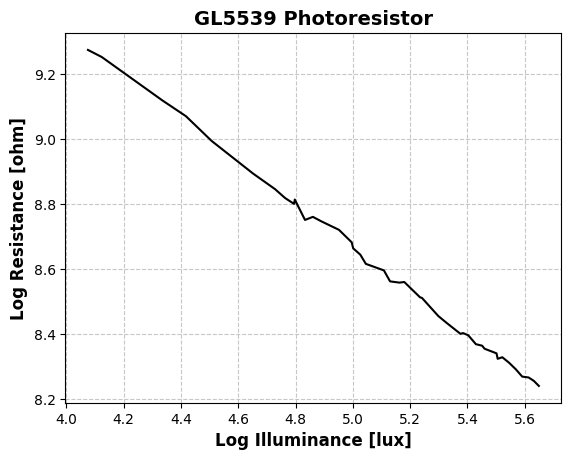

In [2401]:
# Plot the raw data:

plt.plot(
    sample_data_df["log_illuminance_lux"],
    sample_data_df["log_resistance_ohm"],
    color="black",
)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Log Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Log Resistance [ohm]", fontsize=12, color="black", fontweight="bold")
plt.title("GL5539 Photoresistor", fontsize=14, color="black", fontweight="bold")
plt.show()

In [2402]:
# Linear regression:

gamma, log_r0 = np.polyfit(
    sample_data_df["log_illuminance_lux"], sample_data_df["log_resistance_ohm"], 1
)
r0 = np.exp(log_r0)

# Calculate R-squared
y_true = sample_data_df["log_resistance_ohm"]
y_pred = gamma * sample_data_df["log_illuminance_lux"] + log_r0
r_squared = np.corrcoef(y_true, y_pred)[0, 1] ** 2

print(f"Gamma: {gamma}")
print(f"R0: {r0}")
print(f"R-squared: {r_squared}")

Gamma: -0.6676156587715585
R0: 163496.3829956341
R-squared: 0.9986100026333473


In [2403]:
# Define the photoresistor function:


def teorical_resistance(lux: float) -> float:
    """
    Calculate the resistance of a photoresistor from teorical curve.

    Args:
        lux: The illuminance in lux.

    Returns:
        The resistance in ohms.
    """

    return r0 * (lux**gamma)


def teorical_illuminance(resistance: float) -> float:
    """
    Calculate the illuminance from the resistance of a photoresistor from teorical curve.

    Args:
        resistance: The resistance in ohms.

    Returns:
        The illuminance in lux.
    """

    return (resistance / r0) ** (1 / gamma)

In [2404]:
# Compute the calculated resistance:

sample_data_df["calculated_resistance_ohm"] = sample_data_df["illuminance_lux"].apply(
    lambda x: teorical_resistance(x)
)
sample_data_df["log_calculated_resistance_ohm"] = np.log(
    sample_data_df["calculated_resistance_ohm"]
)
sample_data_df.head()

,resistance_ohm,illuminance_lux,log_resistance_ohm,log_illuminance_lux,calculated_resistance_ohm,log_calculated_resistance_ohm
0,10670.0,58.9,9.275191,4.075841,10758.493471,9.283451
1,10440.0,61.8,9.253400,4.123903,10418.763949,9.251364
2,9130.0,76.4,9.119321,4.335983,9043.270804,9.109776
3,8700.0,82.9,9.071078,4.417635,8563.496064,9.055264
4,8060.0,90.7,8.994669,4.507557,8064.526451,8.995230


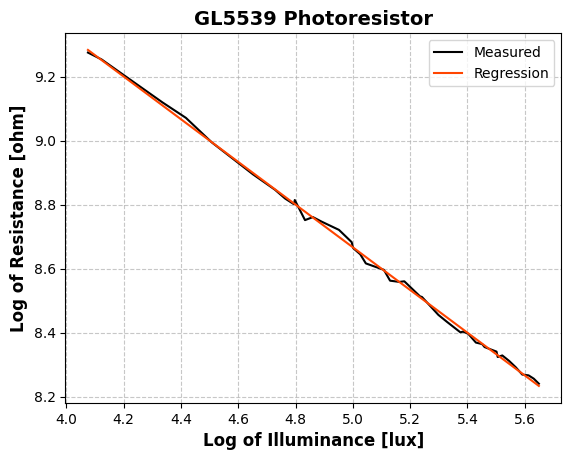

In [2405]:
# Compare the calculated resistance with the measured resistance: Logarithmic values

plt.plot(
    sample_data_df["log_illuminance_lux"],
    sample_data_df["log_resistance_ohm"],
    color="black",
    label="Measured",
)
plt.plot(
    sample_data_df["log_illuminance_lux"],
    sample_data_df["log_calculated_resistance_ohm"],
    color="orangered",
    label="Regression",
)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Log of Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Log of Resistance [ohm]", fontsize=12, color="black", fontweight="bold")
plt.title("GL5539 Photoresistor", fontsize=14, color="black", fontweight="bold")
plt.legend()
plt.show()

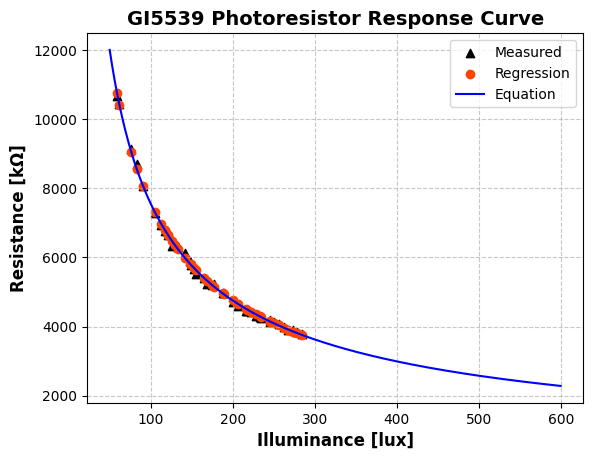

In [2406]:
# Compare the calculated resistance with the measured resistance

sample_data_df["calculated_illuminance_lux"] = sample_data_df["resistance_ohm"].apply(
    lambda x: teorical_illuminance(x)
)

illuminance_lux = np.arange(MIN_ILLUMINANCE_LUX, MAX_ILLUMINANCE_LUX, 0.1)
resistance_ohm = [teorical_resistance(x) for x in illuminance_lux]

plt.scatter(
    sample_data_df["illuminance_lux"],
    sample_data_df["resistance_ohm"],
    color="black",
    label="Measured",
    marker="^",
)
plt.scatter(
    sample_data_df["illuminance_lux"],
    sample_data_df["calculated_resistance_ohm"],
    color="orangered",
    label="Regression",
)
plt.plot(illuminance_lux, resistance_ohm, color="blue", label="Equation")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Resistance [kΩ]", fontsize=12, color="black", fontweight="bold")
plt.title(
    "GI5539 Photoresistor Response Curve", fontsize=14, color="black", fontweight="bold"
)
plt.legend()
plt.show()

In [2407]:
# Analyze the error between the measured and calculated illuminance:

sample_data_df["absolute_error"] = abs(
    sample_data_df["calculated_illuminance_lux"] - sample_data_df["illuminance_lux"]
)

sample_data_df["absolute_error"].describe()

count    41.000000
mean      2.158569
std       1.629050
min       0.076307
25%       0.709314
50%       1.765640
75%       3.623945
max       5.069508
Name: absolute_error, dtype: float64

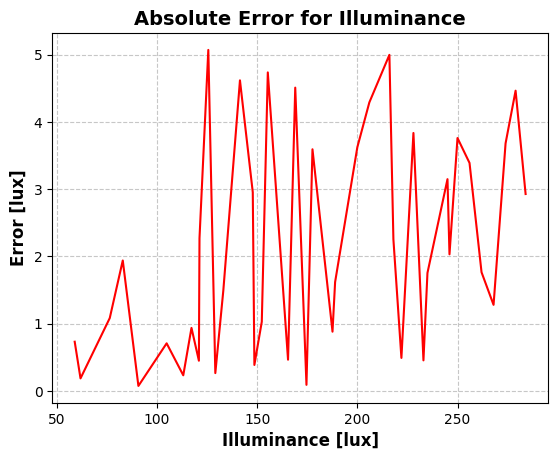

In [2408]:
# Plot the absolute error:

plt.plot(
    sample_data_df["illuminance_lux"],
    sample_data_df["absolute_error"],
    color="red",
)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Error [lux]", fontsize=12, color="black", fontweight="bold")
plt.title(
    "Absolute Error for Illuminance", fontsize=14, color="black", fontweight="bold"
)
plt.show()

In [2409]:
# Desing the voltage divider:

supplied_voltage = 5.0  # Arduino UNO R3

reference_illuminance = 350
reference_voltage = 3.77
reference_resistance = teorical_resistance(reference_illuminance)
print(f"Reference resistance: {reference_resistance} ohm")
print(f"Reference voltage: {reference_voltage} V")
print(f"Reference illuminance: {reference_illuminance} lux")

teorical_fixed_divider_resistance = (
    reference_resistance * reference_voltage / (supplied_voltage - reference_voltage)
)
print(f"Teorical fixed divider resistance: {teorical_fixed_divider_resistance} ohm")

fixed_divider_resistance = 10000  # 10kΩ
print(f"Fixed divider resistance: {fixed_divider_resistance} ohm")

Reference resistance: 3273.772421767035 ohm
Reference voltage: 3.77 V
Reference illuminance: 350 lux
Teorical fixed divider resistance: 10034.245552895709 ohm
Fixed divider resistance: 10000 ohm


In [2410]:
# Definition of voltage divider function:


def ldr_voltage(r1: float) -> float:
    """
    Calculate the output voltage of a voltage divider.

    Args:
        r1: The resistance of the first resistor.

    Returns:
        The output voltage in V
    """

    return supplied_voltage * fixed_divider_resistance / (r1 + fixed_divider_resistance)


def ldr_current(r1: float) -> float:
    """
    Calculate the output current of a voltage divider.

    Args:
        v: The output voltage.

    Returns:
        The output current in mA
    """

    return (supplied_voltage / (fixed_divider_resistance + r1)) * 1000

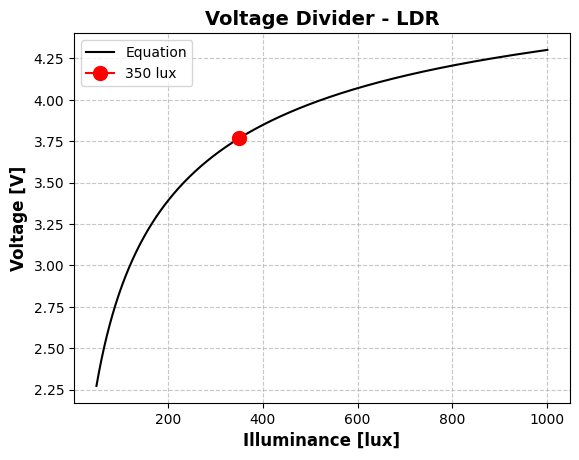

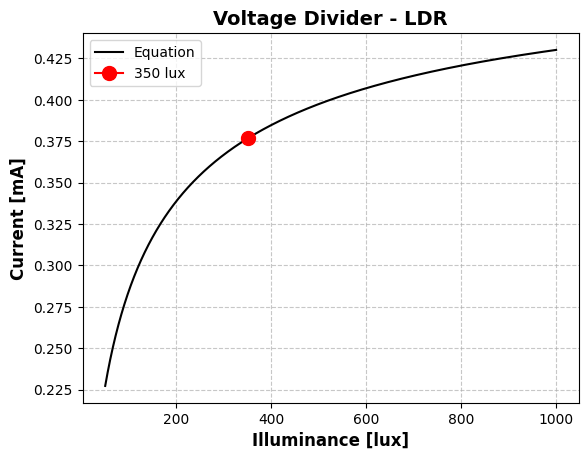

In [2411]:
# Plot the voltage vs illuminance in voltage divider

reference_current = ldr_current(reference_resistance)

illuminance_lux = np.arange(50, 1000, 0.1)
resistance_ohm = [teorical_resistance(x) for x in illuminance_lux]

voltage_v = [ldr_voltage(r) for r in resistance_ohm]
current_ma = [ldr_current(r) for r in resistance_ohm]

plt.plot(illuminance_lux, voltage_v, color="black", label="Equation")
plt.plot(
    reference_illuminance,
    reference_voltage,
    marker="o",
    color="red",
    markersize=10,
    label=f"{reference_illuminance} lux",
)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Voltage [V]", fontsize=12, color="black", fontweight="bold")
plt.title("Voltage Divider - LDR", fontsize=14, color="black", fontweight="bold")
plt.legend()
plt.show()

plt.plot(illuminance_lux, current_ma, color="black", label="Equation")
plt.plot(
    reference_illuminance,
    reference_current,
    marker="o",
    color="red",
    markersize=10,
    label=f"{reference_illuminance} lux",
)
plt.grid(True, linestyle="--", alpha=0.7)
plt.xlabel("Illuminance [lux]", fontsize=12, color="black", fontweight="bold")
plt.ylabel("Current [mA]", fontsize=12, color="black", fontweight="bold")
plt.title("Voltage Divider - LDR", fontsize=14, color="black", fontweight="bold")
plt.legend()
plt.show()